In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
from shutil import copyfile
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*/*_score.sc')], ignore_index = True)
print(df)

      SCORE:  total_score  cen_rama  cen_total  dslf_fa13   fa_atr    fa_dun  \
0     SCORE:    49687.137    16.539   -211.550        0.0 -617.750  3352.867   
1     SCORE:    30185.190     7.999   -334.651        0.0 -534.217  3254.050   
2     SCORE:    25095.616     5.533   -432.939        0.0 -512.184  3212.922   
3     SCORE:    24031.945     4.815   -371.121        0.0 -514.248  3186.394   
4     SCORE:    20349.165     0.053   -432.952        0.0 -516.410  3043.014   
...      ...          ...       ...        ...        ...      ...       ...   
1995  SCORE:    61033.980    17.707    -12.556        0.0 -733.621  3411.928   
1996  SCORE:    20885.595     4.953   -382.937        0.0 -516.501  2994.421   
1997  SCORE:    27531.130     9.474   -292.193        0.0 -535.126  3080.894   
1998  SCORE:    55760.964    10.299     24.771        0.0 -656.341  3441.351   
1999  SCORE:    59949.325    28.934     88.272        0.0 -678.844  3290.231   

      fa_elec  fa_intra_rep     fa_rep 

55.475027000000004 38.17264775821435


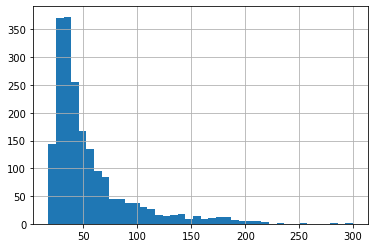

In [3]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

7.726277 8.32326117850412


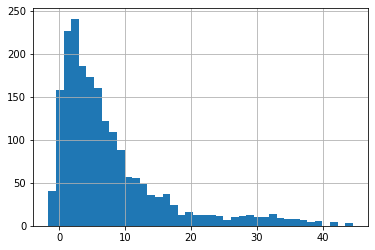

In [4]:
df['cen_rama'].hist(bins=40)
print(df['cen_rama'].mean(), df['cen_rama'].std())

-69.318806 8.906566738923672


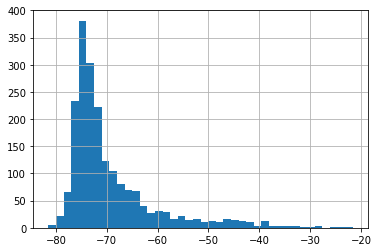

In [5]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

36614.1741115 25530.957830260242


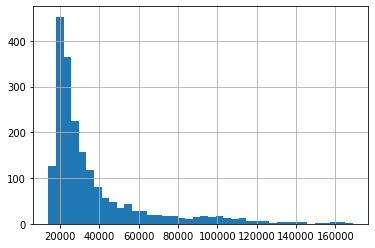

In [6]:
df['total_score'].hist(bins=40)
print(df['total_score'].mean(), df['total_score'].std())

49.397489 94.99453475716246


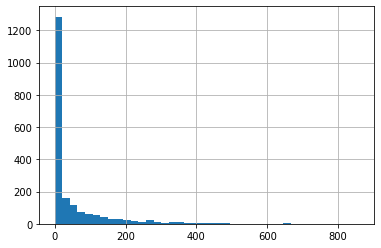

In [7]:
df['vdw'].hist(bins=40)
print(df['vdw'].mean(), df['vdw'].std())

In [17]:
best_round1 = df.loc[(df['vdw'] < 1.0) & (df['omega'] < 21.1) & (df['cen_rama'] < 5.0) & (df['hbond_lr_bb'] < -75)]
#print(best_round1)
for model in best_round1.description:
    folder_id = model.split("_")[0]
    source = folder_id + "/" + model + ".pdb"
    target = "best_20/" + model + ".pdb"
    copyfile(source, target)